# DAO Starfinder - bin1 

In [1]:
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.io import fits
import numpy as np
from importlib import reload
from imaka.analysis import plot_stats
from imaka.analysis import plot_redu
from imaka.reduce import util
from astropy.stats import sigma_clipped_stats

from imaka.reduce import reduce_fli as redu
from imaka.reduce import reduce_STA
from imaka.reduce import calib
from imaka.reduce import util
from imaka.analysis import moffat


## Pulling from a pre-found file

In [2]:
# Setting up and choosing a file:
from imaka.reduce.nights import reduce_2022_01_20 as redu
night = '20220120'
fld = 'Beehive-W'

root_dir = redu.root_dir
stats_dir = root_dir + "reduce/stats/"
plots_dir = root_dir + "reduce/plots/"
stack_dir = root_dir + "reduce/stacks/"

# pick a file based on key
key = 'open_r2'
i=8

img_num = redu.dict_images[key]
suf = redu.dict_suffix[key]
test_img_base = 'sta{img:03d}{suf:s}_scan'.format(img=img_num[i], suf=suf)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


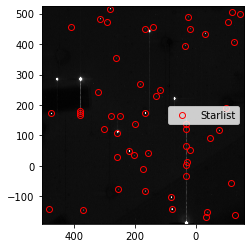

In [6]:
img, hdr = fits.getdata(root_dir + f'{fld}/' + test_img_base + '.fits', header=True)
scale = util.get_plate_scale(img, hdr)
del img
del hdr
stars = Table.read(root_dir + f'reduce/{fld}/' + test_img_base + '_clean_stars.txt', format='ascii')

xscale = scale
yscale = 1.073 * scale
xref = 2525
yref = 2810
img, hdr = fits.getdata(root_dir + f'reduce/{fld}/' + test_img_base + '_clean.fits', header=True)
x_arc = (stars['xcentroid'] - xref) * xscale
y_arc = (stars['ycentroid'] - yref) * yscale
img_x_arc = (np.arange(img.shape[1]) - xref) * xscale
img_y_arc = (np.arange(img.shape[0]) - yref) * yscale
extent = [img_x_arc.min(), img_x_arc.max(), img_y_arc.min(), img_y_arc.max()]
plt.imshow(img, vmin=0, vmax=500, origin='lower', cmap=plt.cm.gray, extent=extent) 
idx = np.where((stars['mag'] > -8) & (stars['mag'] < -2))[0]
plt.plot(x_arc[idx], y_arc[idx], 'ro', mec='red', mfc='none', label='Starlist')
plt.gca().invert_xaxis()
#plt.xlim(5, -5)
#plt.ylim(-5, 5)
plt.legend()

In [ ]:
## Directly from starfinder